In [91]:
import torch
import random
import pandas as pd
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

In [92]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [93]:
scaler = StandardScaler()
label_encoder = LabelEncoder()

In [94]:
df = pd.read_csv('/content/bodyPerformance.csv')
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [95]:
df['gender'] = label_encoder.fit_transform(df['gender'])
df['class'] = label_encoder.fit_transform(df['class'])
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,1,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,2
13389,21.0,1,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,3
13390,39.0,1,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,0
13391,64.0,0,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,3


In [96]:
col_list = ['age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm']
df[col_list] = scaler.fit_transform(df[col_list])
df


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,-0.717432,1,0.443873,0.652150,-0.267367,0.112009,-0.015959,1.688190,0.377317,1.416961,0.674009,2
1,-0.864220,1,-0.422465,-0.974734,-1.039081,-0.167278,-0.287820,-0.053073,0.128984,0.926634,0.975013,0
2,-0.423857,1,1.310211,0.883127,-0.432734,1.229158,1.479276,0.737554,-0.379509,0.646446,-0.229005,2
3,-0.350463,1,0.704961,0.305684,-0.667004,-0.260374,1.139450,0.417538,-0.001096,0.926634,0.724176,1
4,-0.644038,1,0.621888,0.021147,-0.846152,-0.818948,-0.219855,0.615195,1.406129,0.366259,0.674009,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,-0.864220,1,0.420138,0.364265,-0.970178,-0.446565,0.731658,-0.109547,0.259063,0.506353,0.197418,2
13389,-1.157795,1,1.322079,-0.296866,-1.535183,-0.446565,-0.151890,-0.373090,-1.668480,0.576400,-0.580177,3
13390,0.163293,1,1.025388,1.092346,-0.432734,-0.074183,0.119971,2.497643,0.140809,0.366259,0.975013,0
13391,1.998138,0,-2.665451,-0.815728,2.364730,-1.005140,-0.627647,-1.662566,-0.710621,-2.785848,-2.887878,3


In [97]:
X = df.drop('class', axis=1)
Y = df['class']
Y

0        2
1        0
2        2
3        1
4        1
        ..
13388    2
13389    3
13390    0
13391    3
13392    2
Name: class, Length: 13393, dtype: int64

In [98]:
X_train, X_remain, Y_train, Y_remain = train_test_split(X, Y, test_size=0.3, random_state=42)
X_cv, X_test, Y_cv, Y_test = train_test_split(X_remain, Y_remain, test_size=0.5, random_state=42)

In [99]:
class MLP(torch.nn.Module):
    def __init__(self, n_inputs, num_classes, dropout):
        super(MLP, self).__init__()
        self.hidden1 = torch.nn.Linear(n_inputs, 16)
        self.act1 = torch.nn.Tanh()
        self.hidden2 = torch.nn.Linear(16, 8)
        self.act2 = torch.nn.Tanh()
        self.hidden3 = torch.nn.Linear(8, 4)
        self.act3 = torch.nn.Tanh()
        self.hidden4 = torch.nn.Linear(4, 2)
        self.act4 = torch.nn.Tanh()
        self.output = torch.nn.Linear(2, num_classes)
        self.dropout = torch.nn.Dropout(p=0.2)

    def forward(self, X):
        X = self.hidden1(X)
        X = self.act1(X)
        X = self.hidden2(X)
        X = self.act2(X)
        X = self.hidden3(X)
        X = self.act3(X)
        X = self.hidden4(X)
        X = self.act4(X)
        X = self.dropout(X)
        X = self.output(X)
        return X

In [100]:
def fitness(model, X, Y):
    model.eval()
    with torch.no_grad():
        inputs = torch.from_numpy(X.values).float().to(device)
        targets = torch.from_numpy(Y.values).to(device)
        outputs = model(inputs)
        accuracy = (torch.argmax(outputs, dim=1) == targets).float().mean().item()
    return accuracy

In [101]:
def crossover(parent1, parent2, best_fit_1, best_fit_2, alpha=0.5):
    weight_parent1 = best_fit_1 / (best_fit_1 + best_fit_2)
    weight_parent2 = 1 - weight_parent1

    child1 = MLP(X_train.shape[1], len(Y_train.unique()), 0.2).to(device)
    child2 = MLP(X_train.shape[1], len(Y_train.unique()), 0.2).to(device)

    midpoint = np.random.randint(0, len(list(parent1.state_dict().items())))

    for index, (name, param) in enumerate(child1.named_parameters()):
        if 'weight' in name or 'bias' in name:
            if index < midpoint:
                child1.state_dict()[name].copy_(weight_parent1 * parent1.state_dict()[name] +
                                                (1 - weight_parent1) * parent2.state_dict()[name])
                child2.state_dict()[name].copy_(weight_parent2 * parent2.state_dict()[name] +
                                                (1 - weight_parent2) * parent1.state_dict()[name])
            else:
                child1.state_dict()[name].copy_(parent1.state_dict()[name])
                child2.state_dict()[name].copy_(parent2.state_dict()[name])

    return child1, child2

In [102]:
def mutate(model, mutation_rate=0.01):
    for name, param in model.named_parameters():
        if 'weight' in name or 'bias' in name:
            if random.random() < mutation_rate:
                noise = torch.randn_like(param) * 0.15
                param.data += noise

In [103]:
def tournament(population, fitnesses, k=3):
    selected = random.sample(list(zip(population, fitnesses)), k)
    best_individual, best_fitness = max(selected, key=lambda x: x[1])
    return best_individual, best_fitness

In [104]:
def genetic_algorithm(X_train, Y_train, X_valid, Y_valid, population_size=300, mutation_rate=0.5, alpha=0.5):
    population = [MLP(X_train.shape[1], len(Y_train.unique()), 0.2).to(device) for _ in range(population_size)]
    best_fitnesses = []
    best_valid_accuracy = 0.0
    patience = 200
    patience_counter = 0
    generation = 0

    while patience_counter < patience:
        fitnesses = [fitness(model, X_train, Y_train) for model in population]
        best_fitnesses.append(max(fitnesses))
        valid_accuracy = fitness(population[fitnesses.index(max(fitnesses))], X_valid, Y_valid)
        if not generation % 50:
          print(f'Generation {generation+1}, Best Accuracy: {best_fitnesses[-1]*100:.2f}% , Validation Accuracy: {valid_accuracy*100:.2f}%')
          print('*'*50)

        if valid_accuracy > best_valid_accuracy:
            best_valid_accuracy = valid_accuracy
            patience_counter = 0
        else:
            patience_counter += 1

        new_population = []
        best_model_index = fitnesses.index(best_fitnesses[-1])
        new_population.append(population[best_model_index])

        while len(new_population) < population_size:
            parent1, best_fit_1 = tournament(population, fitnesses)
            parent2, best_fit_2 = tournament(population, fitnesses)
            if parent1 != parent2:
                child1, child2 = crossover(parent1, parent2, best_fit_1, best_fit_2, alpha)
                mutate(child1, mutation_rate)
                mutate(child2, mutation_rate)
                new_population.extend([child1, child2])

        population = new_population[:population_size]
        generation += 1

    best_model_index = fitnesses.index(max(fitnesses))
    best_model = population[best_model_index]
    return best_model, best_fitnesses

In [105]:
best_model, best_fitnesses = genetic_algorithm(X_train, Y_train, X_cv, Y_cv)

Generation 1, Best Accuracy: 31.94% , Validation Accuracy: 33.70%
**************************************************
Generation 51, Best Accuracy: 55.30% , Validation Accuracy: 56.55%
**************************************************
Generation 101, Best Accuracy: 58.81% , Validation Accuracy: 59.28%
**************************************************
Generation 151, Best Accuracy: 60.46% , Validation Accuracy: 62.62%
**************************************************
Generation 201, Best Accuracy: 60.82% , Validation Accuracy: 61.67%
**************************************************
Generation 251, Best Accuracy: 61.31% , Validation Accuracy: 62.32%
**************************************************
Generation 301, Best Accuracy: 61.70% , Validation Accuracy: 62.67%
**************************************************
Generation 351, Best Accuracy: 61.99% , Validation Accuracy: 62.77%
**************************************************
Generation 401, Best Accuracy: 62.22% , Validation 

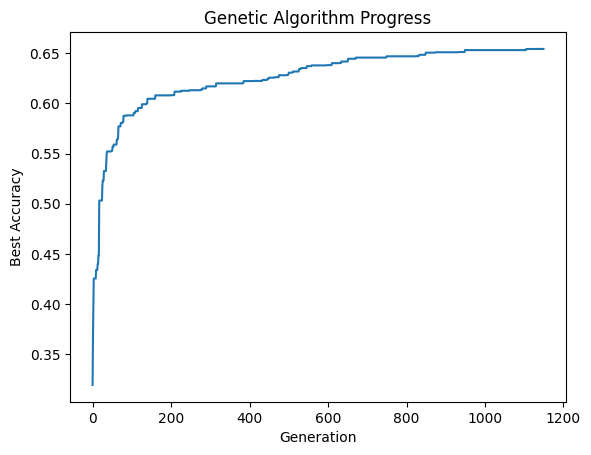

In [106]:
plt.plot(best_fitnesses)
plt.xlabel('Generation')
plt.ylabel('Best Accuracy')
plt.title('Genetic Algorithm Progress')
plt.show()

In [107]:
def evaluate_model(model, X_test, Y_test):
    model.eval()
    with torch.no_grad():
        inputs = torch.from_numpy(X_test.values).float().to(device)
        targets = torch.from_numpy(Y_test.values).to(device)
        outputs = model(inputs)
        accuracy = (torch.argmax(outputs, dim=1) == targets).float().mean().item()
    return accuracy

In [108]:
test_accuracy = evaluate_model(best_model, X_test, Y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Test Accuracy: 65.16%


In [109]:
y_pred = torch.argmax(best_model(torch.from_numpy(X_test.values).float().to(device)), dim=1).cpu().numpy()
y_true = Y_test.values

class_accuracies = []
for c in range(4):
    class_idx = (Y_test == c)
    class_accuracy = (y_pred[class_idx] == c).mean()
    class_accuracies.append(class_accuracy)


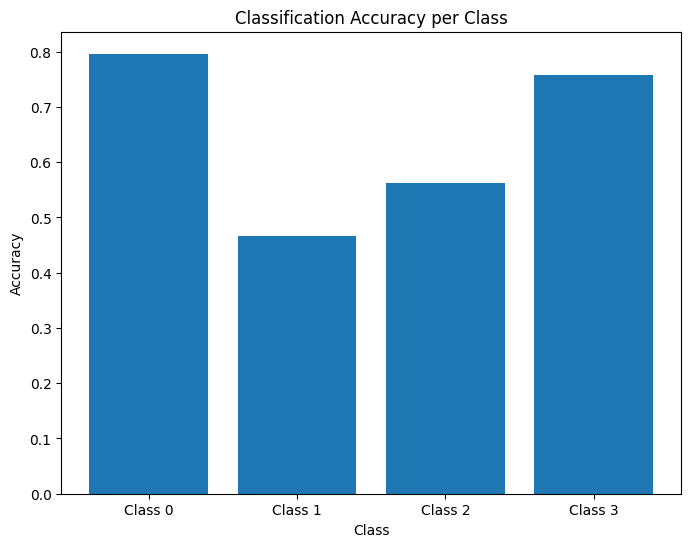

In [110]:

plt.figure(figsize=(8, 6))
plt.bar(range(4), class_accuracies)
plt.xticks(range(4), ['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Classification Accuracy per Class')
plt.show()

# **Optimize**

**The core issue in `crossover` is the repeated use of `copy_` to modify the `child1` and `child2` state dictionaries. PyTorch operations are often optimized for in-place modifications.  Instead of creating copies, we can directly modify the tensors.**

**The primary optimization here might be to reduce the number of times call `random.random()`. we can pre-generate a list of random numbers for each parameter instead of generating them individually within the loop.**





**I think The `tournament` function is already efficient** :)
**we can consider using numba for potential speedups, but the overhead might not be significant for this small function.**

**We can convert X and Y to PyTorch tensors only once and outside the `fitness function`, and then pass the same tensors to the function.**

------------------------------------------------------------------------

# **Genetic vs Gradient Descent**

### **Genetic Algorithms (GAs)**

**Advantages:**

* GAs are good at finding global optima, meaning the best possible solution in the entire search space. This is because they explore a wide range of solutions.
* GAs can work with functions that are not differentiable, which is a requirement for gradient-based methods like GD.
* GAs can be adapted to handle complex constraints by incorporating them into the fitness function or the selection process.


**Disadvantages:**

* GAs often converge slower than gradient-based methods, especially for problems with **smooth landscapes.**
* GAs can be sensitive to the choice of parameters like population size, mutation rate, and crossover rate. Finding optimal parameters can require experimentation.
* While better at finding global optima than GD, GAs can still get stuck in local optima if they are not well-tuned.
* GA results can vary due to random elements (mutation and crossover). This can make it difficult to predict or reproduce results.

************************************

## **Gradient Descent (GD)**

**Advantages:**

* GD can converge much faster than GAs, especially for **smooth, unimodal problems.**
* GD is deterministic, meaning that with the same starting point and parameters, it will always produce the same results.
* GD is a well-understood algorithm with extensive theoretical analysis and practical implementation.

**Disadvantages:**

* GD is prone to getting stuck in local optima, especially for problems with multiple minima.
* GD requires the objective function to be differentiable, limiting its applicability to non-differentiable problems.
* Handling constraints in GD can be challenging and may require specialized techniques.